# Unsupervised Learning

Objective : The notebook will explore unsupervised algorithms to explore and find structure in the gene expression data.

## Library Imports

In [93]:
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import umap

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from scipy.cluster.hierarchy import ward, dendrogram, fcluster, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF

RANDOM_SEED = 42

## Import Data
Importing data with 10 principal components, this number of principal components was found to be the highest performing data set on supervised learning tasks.  Clustering of the 10 PCA data set is done with both the 10 PCA data set and using the SMOTE technique to adjust for class imbalance. 

In [94]:
# Import PCA data
train_file = "data/X_train_10_PCs.csv"
test_file = "data/X_test_10_PCs.csv"
ytrain_file = 'data/y_train.csv'
ytest_file = 'data/y_test.csv'

PCA_X_train = pd.read_csv(train_file)
PCA_X_train.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_train.set_index('CellID', inplace = True)

PCA_X_test = pd.read_csv(test_file)
PCA_X_test.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_test.set_index('CellID', inplace = True)

y_train = pd.read_csv(ytrain_file)
y_train.set_index('CellID', inplace = True)

y_test = pd.read_csv(ytest_file)
y_test.set_index('CellID', inplace = True)

#rebalance 
sm = SMOTE(random_state=RANDOM_SEED)
X_train_res, y_train_res = sm.fit_resample(PCA_X_train, y_train)

# Clustering
## Agglomerative Clustering

In [3]:
# Create agglomerative model 
# Using the ward function to create the model
agglo_model = ward(PCA_X_train)

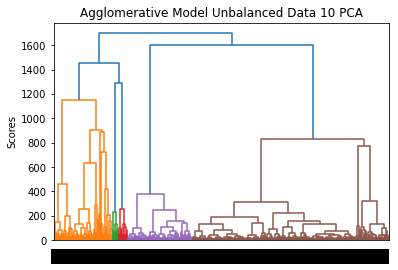

In [4]:
#plot unbalanced dendrogram
plt.figure()
dendrogram(agglo_model)
plt.title('Agglomerative Model Unbalanced Data 10 PCA')
plt.ylabel('Scores')
plt.show()

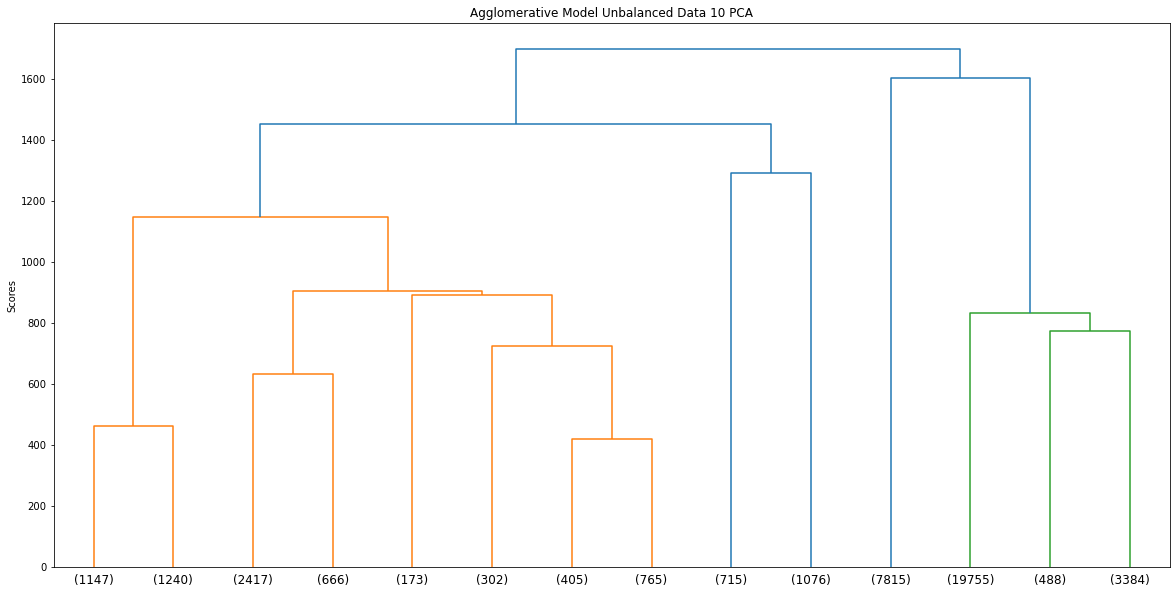

In [5]:
#plot unbalanced dendrogram
# Sources: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
plt.figure(figsize = (20,10))
dendrogram(agglo_model, p = 14, truncate_mode = 'lastp', show_leaf_counts = True)
plt.title('Agglomerative Model Unbalanced Data 10 PCA')
plt.ylabel('Scores')
plt.show()

In [6]:
# Create Labels and Score Cluster Model   
#create labels from the aggolmerative clustering to test 
k=14  # number of clusters
agglo_labels  = fcluster(agglo_model, k, criterion='maxclust')

agglo_adjrand = metrics.adjusted_rand_score(y_train.type.values, agglo_labels)
agglo_homogeneity = metrics.homogeneity_score(y_train.type.values, agglo_labels)
agglo_vmeasure = metrics.v_measure_score(y_train.type.values, agglo_labels)
agglo_complete = metrics.completeness_score(y_train.type.values, agglo_labels) 
score = pd.DataFrame({'Agglomerative 10PCs' : [agglo_adjrand, agglo_homogeneity, agglo_vmeasure, agglo_complete]},
    index=['Adj_Rand', 'Homogeneity', 'Vmeasure', 'Completeness'])

In [7]:
# How did the  agglomerative model do?
score.round(3)

,Agglomerative 10PCs
Adj_Rand,0.552
Homogeneity,0.687
Vmeasure,0.739
Completeness,0.800


In [8]:
# repeat process for 100 component PCA
 # Import PCA data
train100_file = "data/X_train_100_PCs.csv"
test100_file = "data/X_test_100_PCs.csv"

PCA_X_train100 = pd.read_csv(train100_file)
PCA_X_train100.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_train100.set_index('CellID', inplace = True)

PCA_X_test100 = pd.read_csv(test100_file)
PCA_X_test100.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_test100.set_index('CellID', inplace = True)

agglo_model100 = ward(PCA_X_train100)
agglo_labels100  = fcluster(agglo_model100, k, criterion='maxclust')
agglo_adjrand100 = metrics.adjusted_rand_score(y_train.type.values, agglo_labels100)
agglo_homogeneity100 = metrics.homogeneity_score(y_train.type.values, agglo_labels100)
agglo_vmeasure100 = metrics.v_measure_score(y_train.type.values, agglo_labels100)
agglo_complete100 = metrics.completeness_score(y_train.type.values, agglo_labels100)
score['Agglomerative 100PCs'] = [agglo_adjrand100, agglo_homogeneity100, agglo_vmeasure100, agglo_complete100  ]



## K-Means Clustering

In [9]:
kmeans = KMeans(n_clusters=14, random_state=42).fit(PCA_X_train)
kmeans100 = KMeans(n_clusters=14, random_state=42).fit(PCA_X_train100)

In [10]:
# Score K-means
kmean_adjrand = metrics.adjusted_rand_score(y_train.type.values, kmeans.labels_)
kmean_homogeneity = metrics.homogeneity_score(y_train.type.values, kmeans.labels_)
kmean_vmeasure = metrics.v_measure_score(y_train.type.values, kmeans.labels_)
kmean_complete = metrics.completeness_score(y_train.type.values, kmeans.labels_)
score['k-means PC10'] = [kmean_adjrand, kmean_homogeneity, kmean_vmeasure, kmean_complete]

kmean_adjrand100 = metrics.adjusted_rand_score(y_train.type.values, kmeans100.labels_)
kmean_homogeneity100 = metrics.homogeneity_score(y_train.type.values, kmeans100.labels_)
kmean_vmeasure100 = metrics.v_measure_score(y_train.type.values, kmeans100.labels_)
kmean_complete100 = metrics.completeness_score(y_train.type.values, kmeans100.labels_)
score['k-means PC100'] = [kmean_adjrand100, kmean_homogeneity100, kmean_vmeasure100, kmean_complete100]

In [11]:
# View results
score.round(3)

,Agglomerative 10PCs,Agglomerative 100PCs,k-means PC10,k-means PC100
Adj_Rand,0.552,0.537,0.645,0.615
Homogeneity,0.687,0.680,0.724,0.755
Vmeasure,0.739,0.731,0.726,0.736
Completeness,0.800,0.791,0.728,0.717


## DBSCAN
DBSCAN with defaults results in very poor model.  
Trying method from lecture notes to find best parameters.

        - sample ~10% of dataframe
        - compute K nearest neighbors distance for small K (eg 1)
        - set eps to multiple of median of distance, ie 3x
        - start with min samples = 5

In [12]:
# Step 1 and 2
from sklearn.neighbors import KNeighborsClassifier
kdistmodel = KNeighborsClassifier(n_neighbors=1)
kdistmodel.fit(PCA_X_train.sample(4000, random_state = RANDOM_SEED), y_train.sample(4000, random_state = RANDOM_SEED).values.ravel())
dist = kdistmodel.kneighbors()
starting_median =  np.median(dist[0])
print("median we need to start with:" , starting_median)

median we need to start with: 1.4500426830343105


In [13]:
# create function to Compute DBSCAN metrics with different parameters

def db_scan_metrics(n_eps, n_min_samples):
    db = DBSCAN(eps=n_eps, min_samples=n_min_samples).fit(PCA_X_train)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    # return results
    return [n_clusters_, n_noise_,metrics.homogeneity_score(y_train.type.values, labels),
      metrics.completeness_score(y_train.type.values, labels),
      metrics.v_measure_score(y_train.type.values, labels),
      metrics.adjusted_rand_score(y_train.type.values, labels),
      metrics.adjusted_mutual_info_score(y_train.type.values, labels)]


In [14]:
dbscan_results = pd.DataFrame(index = ['clusters', 'n_noise', 'homogeneity', 'completeness', 'vmeasure',
    'adj_rand_score', 'adj_mutual_info'], columns = [[5,5,5,6,6,6,7,7,7], [3,6,9,3,6,9,3,6,9]])
dbscan_results.columns.names = ['min_samples', 'eps']
for param in dbscan_results.columns:
    vect = db_scan_metrics(param[1],param[0])
    dbscan_results[(param[0], param[1])] = vect
    

In [15]:
dbscan_results.round(3)

min_samples             5                          6                   \
eps                     3        6       9         3        6       9   
clusters           31.000    2.000   1.000    22.000    3.000   1.000   
n_noise          2826.000  118.000  24.000  3035.000  127.000  25.000   
homogeneity         0.165    0.015   0.001     0.162    0.015   0.001   
completeness        0.650    0.668   0.243     0.649    0.648   0.246   
vmeasure            0.263    0.029   0.001     0.259    0.029   0.001   
adj_rand_score      0.078    0.005   0.000     0.079    0.005   0.000   
adj_mutual_info     0.261    0.029   0.001     0.257    0.029   0.001   

min_samples             7                   
eps                     3        6       9  
clusters           17.000    3.000   2.000  
n_noise          3247.000  138.000  26.000  
homogeneity         0.159    0.015   0.013  
completeness        0.648    0.640   0.848  
vmeasure            0.255    0.029   0.026  
adj_rand_score      0.079    0.005   0.004  
adj_mutual_info     0.254    0.029   0.026

In [16]:
# add best result to score table of all cluster algos
score['DBSCAN'] = [dbscan_results[(7,3)].adj_rand_score, dbscan_results[(7,3)].homogeneity, 
    dbscan_results[(7,3)].vmeasure, dbscan_results[(7,3)].completeness]

score.round(3)

,Agglomerative 10PCs,Agglomerative 100PCs,k-means PC10,k-means PC100,DBSCAN
Adj_Rand,0.552,0.537,0.645,0.615,0.079
Homogeneity,0.687,0.680,0.724,0.755,0.159
Vmeasure,0.739,0.731,0.726,0.736,0.255
Completeness,0.800,0.791,0.728,0.717,0.648


# Visualize Clusters
## Use TSNE and UMAP 

In [17]:
tsne = TSNE(random_state = RANDOM_SEED)
data_tsne = tsne.fit_transform(PCA_X_train)
tsne_df = pd.DataFrame(data_tsne, columns = ['feature0', 'feature1'])
tsne_df['agglolabel'] = agglo_labels
tsne_df['k_label'] = kmeans.labels_
tsne_df['truthlabel'] = y_train.type.values

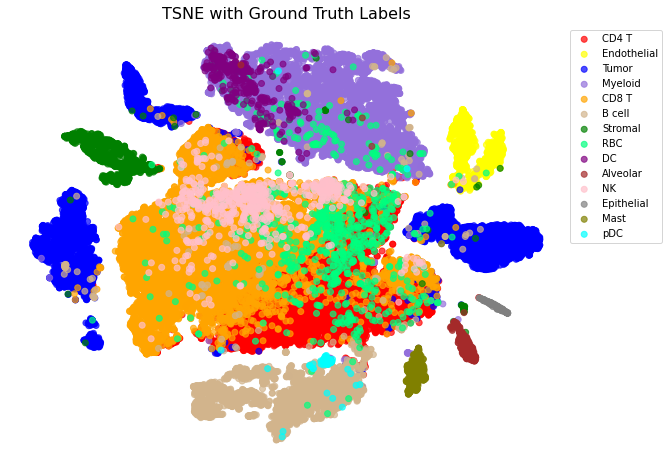

In [150]:
#Chart Cluster with ground truth using TSNE
colors = {'CD4 T':'red', 'Endothelial':'yellow', 'Tumor':'blue', 'Myeloid':'mediumpurple', 'CD8 T': 'orange', 
    'B cell': 'tan','Stromal':'green', 'RBC': 'springgreen', 'DC':'purple', 'Alveolar':'brown', 'NK':'pink',
     'Epithelial':'gray', 'Mast':'olive', 'pDC':'cyan'}

tsne_df['colors'] = tsne_df.truthlabel.map(colors)

fig, ax = plt.subplots(figsize = (10,8))
plt.title('TSNE with Ground Truth Labels',fontsize=16, loc = 'center')
for item in tsne_df['truthlabel'].unique():
    ax.scatter(tsne_df[tsne_df['truthlabel'] == item].feature0,
    tsne_df[tsne_df['truthlabel'] == item].feature1,
    c= tsne_df[tsne_df['truthlabel'] == item].colors,
    label = item,
    alpha = 0.7)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)

ax.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()




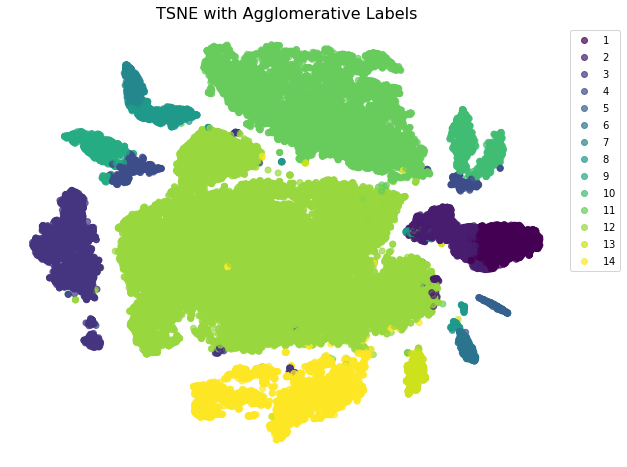

In [153]:
#Chart Cluster with agglomerative using TSNE

fig, ax = plt.subplots(figsize = (10,8))
scatter = ax.scatter(tsne_df.feature0, tsne_df.feature1, c= tsne_df.agglolabel, alpha = 0.7)
plt.title('TSNE with Agglomerative Labels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.legend(*scatter.legend_elements(),bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [136]:
tsne_df.head()

,feature0,feature1,agglolabel,k_label,truthlabel,colors
0,0.968303,-17.150362,12,11,CD4 T,red
1,48.112110,20.562820,10,4,Endothelial,yellow
2,49.160686,-5.054606,2,3,Tumor,blue
3,17.294029,34.352665,11,2,Myeloid,mediumpurple
4,-28.287731,20.513960,12,0,CD8 T,orange


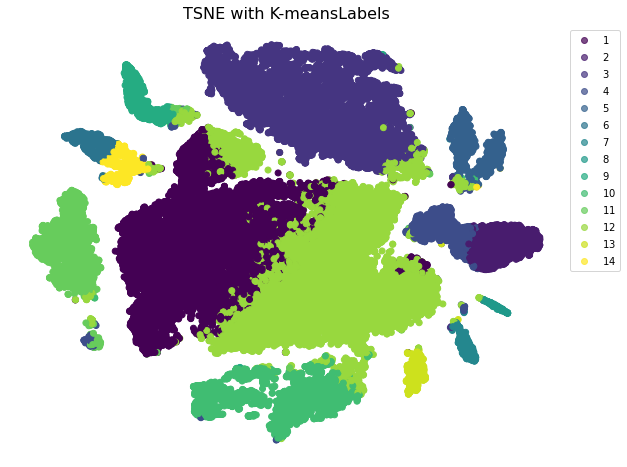

In [154]:
#Chart Cluster with K-means labels using TSNE

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(tsne_df.feature0, tsne_df.feature1, c= tsne_df.k_label)
plt.title('TSNE with K-meansLabels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend(*scatter.legend_elements(),bbox_to_anchor=(1, 1), ncol=1)
plt.show()

## UMAP Visualization

In [21]:
reducer = umap.UMAP(n_neighbors= 25)
embedding = reducer.fit_transform(PCA_X_train)
umap_df = pd.DataFrame(embedding, columns = ['feature0', 'feature1'])
umap_df['truthlabel'] = y_train.type.values
umap_df['agglolabel'] = agglo_labels
umap_df['k_label'] = kmeans.labels_

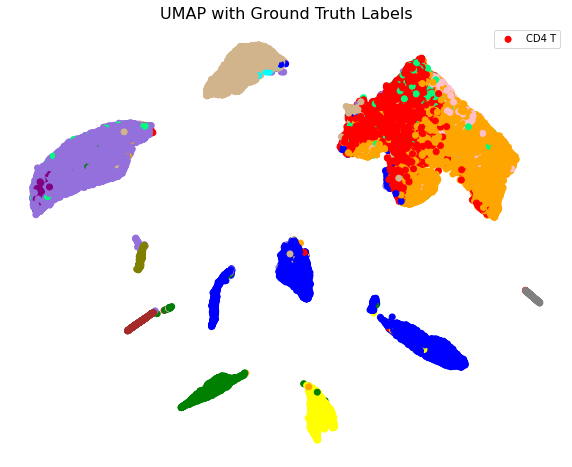

In [22]:
#Chart Cluster with ground truth using UMAP
colors = {'CD4 T':'red', 'Endothelial':'yellow', 'Tumor':'blue', 'Myeloid':'mediumpurple', 'CD8 T': 'orange', 
    'B cell': 'tan','Stromal':'green', 'RBC': 'springgreen', 'DC':'purple', 'Alveolar':'brown', 'NK':'pink',
     'Epithelial':'gray', 'Mast':'olive', 'pDC':'cyan'}
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(umap_df.feature0, umap_df.feature1, c= umap_df.truthlabel.map(colors))
plt.title('UMAP with Ground Truth Labels',fontsize=16, loc = 'center', )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend(tsne_df.truthlabel)
plt.show()

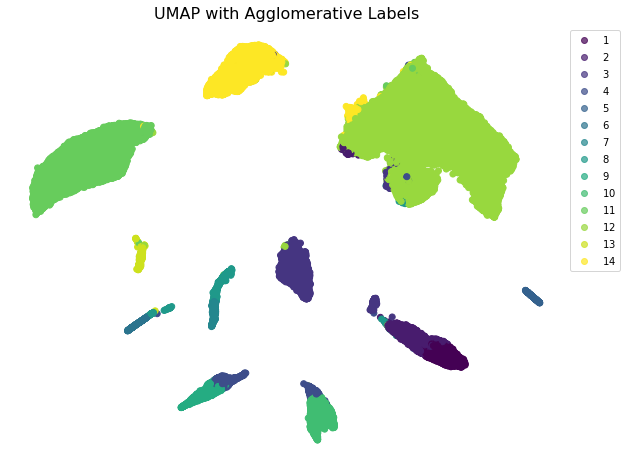

In [155]:
#Chart Cluster with agglomerative using UMAP

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(umap_df.feature0, umap_df.feature1, c= umap_df.agglolabel)
plt.title('UMAP with Agglomerative Labels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend(*scatter.legend_elements(),bbox_to_anchor=(1, 1), ncol=1)
plt.show()

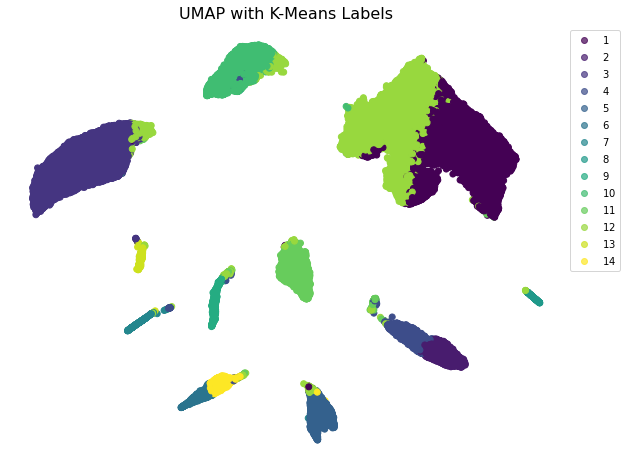

In [156]:
#Chart Cluster with K-means using UMAP

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(umap_df.feature0, umap_df.feature1, c= umap_df.k_label)
plt.title('UMAP with K-Means Labels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend(*scatter.legend_elements(),bbox_to_anchor=(1, 1), ncol=1)
plt.show()

# Explore Non-Negative Matrix Factorization (NMF)
Find latent structure in gene expression data.  Generalize the idea in which NMF which takes a document-matrix and returns a document-topic matrix and a topic-term matrix.  The generalization is to take a cell-gene expression matrix and return a cell-topic matrix and a topic-gene expression matrix.  Here the idea is that the concept "topic" generalizes to clusters of gene expression which may point to cell types.  To state differently the latent structure found - the topics - represent common gene expression patterns that can identify similar cells.  Therefore the document-topic matrix, W,  is a cell-cell type matrix.  Similarily the topic-term matrix represents a cell type - gene expression matrix.  This cell type - gene expression matrix is interesting (possibly) because it may tell us what genes are most expressed in a type of cell.   

In [28]:
# Load raw cell data
X_train_csv = "data/X_train.csv"
X_test_csv = "data/X_test.csv"
X_train_df = pd.read_csv(X_train_csv)
X_train_df.set_index('CellID', inplace = True)


In [29]:
# Fit the model
nmf_model = NMF(n_components=14, init='nndsvd', max_iter = 1000, random_state=42)
W = nmf_model.fit_transform(X_train_df)
H = nmf_model.components_

In [30]:
# Create Labels and score model
nmf_labels = np.argmax(W, axis=1)
nmf_adjrand = metrics.adjusted_rand_score(y_train.type.values, nmf_labels)
nmf_homogeneity = metrics.homogeneity_score(y_train.type.values, nmf_labels)
nmf_vmeasure = metrics.v_measure_score(y_train.type.values, nmf_labels)
nmf_complete = metrics.completeness_score(y_train.type.values, nmf_labels)
score['NMF'] = [nmf_adjrand, nmf_homogeneity, nmf_vmeasure, nmf_complete]

In [31]:
# Normalize the data with log method
norm_X_train = np.log(1+X_train_df) 

In [42]:
# Fit the normalized model
norm_nmf_model = NMF(n_components=14, init='nndsvd', max_iter = 2000, random_state=42)
Wnorm = norm_nmf_model.fit_transform(norm_X_train)
Hnorm = norm_nmf_model.components_

In [43]:
#Score the normalized model
nmf_labels_norm = np.argmax(Wnorm, axis=1)
nmf_adjrand_n = metrics.adjusted_rand_score(y_train.type.values, nmf_labels_norm)
nmf_homogeneity_n = metrics.homogeneity_score(y_train.type.values, nmf_labels_norm)
nmf_vmeasure_n = metrics.v_measure_score(y_train.type.values, nmf_labels_norm)
nmf_complete_n = metrics.completeness_score(y_train.type.values, nmf_labels_norm)
score['NMF Norm'] = [nmf_adjrand_n, nmf_homogeneity_n, nmf_vmeasure_n, nmf_complete_n]

In [44]:
# Show the results matrix with NMF added in
score.round(3)

,Agglomerative 10PCs,Agglomerative 100PCs,k-means PC10,k-means PC100,DBSCAN,NMF,NMF Norm
Adj_Rand,0.552,0.537,0.645,0.615,0.079,0.348,0.372
Homogeneity,0.687,0.680,0.724,0.755,0.159,0.568,0.605
Vmeasure,0.739,0.731,0.726,0.736,0.255,0.522,0.539
Completeness,0.800,0.791,0.728,0.717,0.648,0.483,0.486


In [45]:
# generate top expressed genes per cell type / cluster (topic) using log normed data
# code amended from class notebook
n_types = 14
n_genes = 10

for topic_index in range(0, n_types):
    top_indices = np.argsort(Hnorm[topic_index, :])[::-1]
    top_terms = []
    for term_index in top_indices[0:n_genes]:
        top_terms.append(X_train_df.columns[term_index])
    print("cell type cluster ", topic_index, top_terms)

cell type cluster  0 ['MALAT1', 'MT-CO3', 'MT-CO1', 'MT-CO2', 'MT-CYB', 'MT-ND4', 'MT-ND2', 'MT-ATP6', 'B2M', 'MT-ND1']
cell type cluster  1 ['C1QB', 'APOC1', 'C1QA', 'HLA-DRA', 'APOE', 'CD74', 'FTL', 'CTSD', 'HLA-DPB1', 'C1QC']
cell type cluster  2 ['RPS6', 'RPS18', 'GAPDH', 'RPS12', 'PTMA', 'RPL37', 'TMSB10', 'RPS19', 'RPL35A', 'RPL13A']
cell type cluster  3 ['EEF1A1', 'PFN1', 'ACTB', 'MT-CO1', 'RPL3', 'GAPDH', 'RPS2', 'ACTG1', 'CFL1', 'HNRNPA1']
cell type cluster  4 ['SPP1', 'S100A11', 'CSTB', 'S100A10', 'GSTP1', 'TXN', 'TMSB10', 'FGB', 'FTH1', 'FTL']
cell type cluster  5 ['MT-CO3', 'MT-ATP6', 'MT-ND2', 'MT-CYB', 'MT-CO2', 'MT-ND4', 'MT-CO1', 'MT-ND3', 'MT-ND1', 'MALAT1']
cell type cluster  6 ['IFITM3', 'MT2A', 'IGFBP7', 'ITM2B', 'B2M', 'ZFP36', 'SPARC', 'TIMP1', 'HLA-B', 'IFI27']
cell type cluster  7 ['IGKC', 'SSR4', 'JCHAIN', 'IGHG1', 'IGHG3', 'MZB1', 'IGHA1', 'IGLC2', 'XBP1', 'HERPUD1']
cell type cluster  8 ['HSP90AA1', 'ISG15', 'HSPA1A', 'MALAT1', 'GAPDH', 'B2M', 'LY6E', 'HLA-A'

# Task Based Evaluation of Unsupervised Models
Evaluate the performance improvement of supervised models with the inclusion of unsupervised model generated labels.  If a notable performace is observed, the unsupervised model is adding an additional signal the supervised model can capitalize on.

In [95]:
# Load new classifier dependencies
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [96]:
# Load function from Supervised Learning code
def generate_class_dataframe(model, model_name, input_name, X_test, y_test):
    class_report = classification_report(y_test['type'], model.predict(X_test), zero_division = 0, output_dict = True)
    df = pd.DataFrame.from_dict({key: class_report[key] for key in class_report if key not in ["support", "accuracy", "macro avg", "weighted avg"]}, orient='index')
    midx = pd.MultiIndex.from_arrays([[model_name]*len(df.columns), [input_name]*len(df.columns), df.columns])
    df.columns = midx
    return df

In [163]:
# add labels to PCA data and compare classifier results
# start with kmeans - the best performing model
K_X_train = PCA_X_train.copy(deep=True)
K_X_train['k_label'] = kmeans.labels_

K_X_test = PCA_X_test.copy(deep=True)
kmeans_test = KMeans(n_clusters=14, random_state=42).fit(K_X_test)
K_X_test['k_label'] = kmeans_test.labels_

# agglomerative
A_X_train = PCA_X_train.copy(deep=True)
A_X_train['a_label'] = agglo_labels

A_X_test = PCA_X_test.copy(deep=True)
agglo_modeltest = ward(A_X_test)
agglo_labels_test  = fcluster(agglo_modeltest, k, criterion='maxclust')
A_X_test['a_label'] = agglo_labels_test


In [164]:
random_forest_dataframes = []
random_forest = RandomForestClassifier(random_state=RANDOM_SEED).fit(PCA_X_train, y_train['type'])
random_forest_dataframes.append(generate_class_dataframe(random_forest, "Random Forest", "Control", PCA_X_test, y_test))

random_forest_k = RandomForestClassifier(random_state=RANDOM_SEED).fit(K_X_train, y_train['type'])
random_forest_dataframes.append(generate_class_dataframe(random_forest_k, "Random Forest", "K_mean", K_X_test, y_test))

random_forest_a = RandomForestClassifier(random_state=RANDOM_SEED).fit(A_X_train, y_train['type'])
random_forest_dataframes.append(generate_class_dataframe(random_forest_a, "Random Forest", "Agglomerative", A_X_test, y_test))


In [170]:
rf = pd.concat([random_forest_dataframes[0], random_forest_dataframes[1], random_forest_dataframes[2]], axis =1)
rf

Random Forest                                                  \
                  Control                                K_mean             
                precision    recall  f1-score support precision    recall   
Alveolar         0.989011  0.978261  0.983607      92  0.989011  0.978261   
B cell           0.966746  0.952047  0.959340     855  0.923864  0.950877   
CD4 T            0.867318  0.879188  0.873213    2119  0.847145  0.868334   
CD8 T            0.841040  0.930084  0.883324    2503  0.839411  0.910507   
DC               0.800000  0.118812  0.206897     101  0.923077  0.118812   
Endothelial      0.993631  0.984227  0.988906     317  0.996805  0.984227   
Epithelial       1.000000  0.976744  0.988235      43  1.000000  0.976744   
Mast             0.991228  0.965812  0.978355     117  0.452055  0.564103   
Myeloid          0.936557  0.995028  0.964908    1810  0.939299  0.991713   
NK               0.563636  0.176136  0.268398     176  0.454545  0.056818   
RBC              0.000000  0.000000  0.000000     187  0.333333  0.005348   
Stromal          0.980132  0.967320  0.973684     306  0.980392  0.980392   
Tumor            0.972659  0.987509  0.980028    1441  0.970688  0.988203   
pDC              0.800000  0.400000  0.533333      20  0.500000  0.150000   

                                                                         
                              Agglomerativr                              
             f1-score support     precision    recall  f1-score support  
Alveolar     0.983607      92      0.989011  0.978261  0.983607      92  
B cell       0.937176     855      0.732852  0.949708  0.827305     855  
CD4 T        0.857609    2119      0.803691  0.904200  0.850988    2119  
CD8 T        0.873515    2503      0.890632  0.816620  0.852022    2503  
DC           0.210526     101      0.909091  0.099010  0.178571     101  
Endothelial  0.990476     317      0.996700  0.952681  0.974194     317  
Epithelial   0.988235      43      1.000000  0.953488  0.976190      43  
Mast         0.501901     117      0.991453  0.991453  0.991453     117  
Myeloid      0.964794    1810      0.934299  0.997790  0.965001    1810  
NK           0.101010     176      0.581395  0.142045  0.228311     176  
RBC          0.010526     187      0.000000  0.000000  0.000000     187  
Stromal      0.980392     306      0.980132  0.967320  0.973684     306  
Tumor        0.979367    1441      0.975326  0.987509  0.981379    1441  
pDC          0.230769      20      0.000000  0.000000  0.000000      20

In [166]:
# see mean
rf.mean()

Random Forest  Control        precision      0.835854
                              recall         0.736512
                              f1-score       0.755873
                              support      720.500000
               K_mean         precision      0.796402
                              recall         0.680310
                              f1-score       0.686422
                              support      720.500000
               Agglomerativr  precision      0.770327
                              recall         0.695720
                              f1-score       0.698765
                              support      720.500000
dtype: float64

In [168]:
gbdt_dataframes = []
gbdt = GradientBoostingClassifier(random_state=RANDOM_SEED).fit(PCA_X_train, y_train['type'])
gbdt_dataframes.append(generate_class_dataframe(gbdt, "Gradient-boosted Decision Tree", "Control", PCA_X_test, y_test))

gbdt_k = GradientBoostingClassifier(random_state=RANDOM_SEED).fit(K_X_train, y_train['type'])
gbdt_dataframes.append(generate_class_dataframe(gbdt_k, "Gradient-boosted Decision Tree", "Kmeans", K_X_test, y_test))

gbdt_a = GradientBoostingClassifier(random_state=RANDOM_SEED).fit(A_X_train, y_train['type'])
gbdt_dataframes.append(generate_class_dataframe(gbdt_a, "Gradient-boosted Decision Tree", "Agglomerative", A_X_test, y_test))


In [169]:
gb = pd.concat([gbdt_dataframes[0], gbdt_dataframes[1], gbdt_dataframes[2]], axis =1)
gb

Gradient-boosted Decision Tree                              \
                                   Control                               
                                 precision    recall  f1-score support   
Alveolar                          0.967033  0.956522  0.961749      92   
B cell                            0.964461  0.920468  0.941951     855   
CD4 T                             0.850000  0.874469  0.862061    2119   
CD8 T                             0.847502  0.908110  0.876760    2503   
DC                                0.565217  0.128713  0.209677     101   
Endothelial                       0.984227  0.984227  0.984227     317   
Epithelial                        1.000000  0.953488  0.976190      43   
Mast                              0.990000  0.846154  0.912442     117   
Myeloid                           0.936292  0.990608  0.962685    1810   
NK                                0.479592  0.267045  0.343066     176   
RBC                               0.055556  0.005348  0.009756     187   
Stromal                           0.980000  0.960784  0.970297     306   
Tumor                             0.969842  0.981957  0.975862    1441   
pDC                               0.170213  0.400000  0.238806      20   

                                                                           \
               Kmeans                             Agglomerative             
            precision    recall  f1-score support     precision    recall   
Alveolar     0.988889  0.967391  0.978022      92      0.909091  0.326087   
B cell       0.970407  0.920468  0.944778     855      0.812686  0.959064   
CD4 T        0.848796  0.898065  0.872736    2119      0.872153  0.795186   
CD8 T        0.851286  0.912505  0.880833    2503      0.827302  0.922493   
DC           0.590909  0.128713  0.211382     101      0.542857  0.188119   
Endothelial  0.981132  0.984227  0.982677     317      0.984026  0.971609   
Epithelial   1.000000  0.953488  0.976190      43      1.000000  0.953488   
Mast         0.991228  0.965812  0.978355     117      0.991379  0.982906   
Myeloid      0.935904  0.992265  0.963261    1810      0.938155  0.988950   
NK           0.653846  0.096591  0.168317     176      0.489796  0.272727   
RBC          0.111111  0.010695  0.019512     187      0.181818  0.021390   
Stromal      0.866864  0.957516  0.909938     306      0.901840  0.960784   
Tumor        0.964361  0.957668  0.961003    1441      0.962836  0.970854   
pDC          0.264706  0.450000  0.333333      20      0.000000  0.000000   

                               
                               
             f1-score support  
Alveolar     0.480000      92  
B cell       0.879828     855  
CD4 T        0.831893    2119  
CD8 T        0.872308    2503  
DC           0.279412     101  
Endothelial  0.977778     317  
Epithelial   0.976190      43  
Mast         0.987124     117  
Myeloid      0.962883    1810  
NK           0.350365     176  
RBC          0.038278     187  
Stromal      0.930380     306  
Tumor        0.966828    1441  
pDC          0.000000      20

In [173]:
# Random Forest Feature importance
print("Feature Importance of control: ", random_forest.feature_importances_)
print("Feature Importance of kmeans: ", random_forest_k.feature_importances_)
print("Feature Importance of agglomerative: ", random_forest_a.feature_importances_)

Feature Importance of control:  [0.14915693 0.16506496 0.13985729 0.05196842 0.0572827  0.05006132
 0.13217323 0.10673576 0.04916928 0.09853011]
Feature Importance of kmeans:  [0.1078762  0.14670724 0.1077865  0.0466286  0.04623976 0.04219648
 0.08681997 0.08652776 0.04087126 0.06794618 0.22040006]
Feature Importance of agglomerative:  [0.08186657 0.12046249 0.11064807 0.04639329 0.04181031 0.0400509
 0.09036172 0.09336738 0.0479492  0.09950348 0.22758659]


In [174]:
# Gradient Boosted Decision Tree Feature importance
print("Feature Importance of control: ", gbdt.feature_importances_)
print("Feature Importance of kmeans: ", gbdt_k.feature_importances_)
print("Feature Importance of agglomerative: ", gbdt_a.feature_importances_)

Feature Importance of control:  [0.23422926 0.30408307 0.0723198  0.05888964 0.03480622 0.01209507
 0.14624191 0.03705507 0.0177628  0.08251715]
Feature Importance of kmeans:  [0.03621719 0.2979157  0.05898889 0.05734467 0.03326472 0.01015478
 0.10304371 0.02535819 0.01156362 0.03623648 0.32991205]
Feature Importance of agglomerative:  [0.12750524 0.1743284  0.07142407 0.05561567 0.0039768  0.00752904
 0.04930817 0.03487672 0.02411225 0.07124252 0.38008112]


In [176]:
gb.mean()

Gradient-boosted Decision Tree  Control        precision      0.768567
                                               recall         0.726992
                                               f1-score       0.730395
                                               support      720.500000
                                Kmeans         precision      0.787103
                                               recall         0.728243
                                               f1-score       0.727167
                                               support      720.500000
                                Agglomerative  precision      0.743853
                                               recall         0.665261
                                               f1-score       0.680948
                                               support      720.500000
dtype: float64

In [175]:
rf.mean()

Random Forest  Control        precision      0.835854
                              recall         0.736512
                              f1-score       0.755873
                              support      720.500000
               K_mean         precision      0.796402
                              recall         0.680310
                              f1-score       0.686422
                              support      720.500000
               Agglomerativr  precision      0.770327
                              recall         0.695720
                              f1-score       0.698765
                              support      720.500000
dtype: float64

## Finding the best model to create a feature for a better supervised model
The clustering so far has been to describe, explore, and understand gene expression in different types of cells. We have used the knowledge that we know the number of cell types and have created cell clusters in hope that those clusters are the different cell types.  However, it seems the adding the cluster data is not improving results - perhaps because the supervised and unsupervised are learning overlapping relationships.  To this end, we will now try K-means clustering algorithm, but varying the number of clusters in hope the unsupervised model learns something different that can be exploited downstream.

In [177]:
# run random forest algorithm for cluster odd cluster numbers from 3 to 21

rf_cluster_diff_dataframes = []
random_forest = RandomForestClassifier(random_state=RANDOM_SEED).fit(PCA_X_train, y_train['type'])
rf_cluster_diff_dataframes.append(generate_class_dataframe(random_forest, "Random Forest", "Control", PCA_X_test, y_test))

In [185]:
num_clusters = [3,5,7,9,11,13,15,17,19,21, 23]
feat_importance = []

for clust in num_clusters:
    K_X_train = PCA_X_train.copy(deep=True)
    kmeans_train = KMeans(n_clusters=clust, random_state=42).fit(K_X_train)
    K_X_train['k_label'] = kmeans_train.labels_

    K_X_test = PCA_X_test.copy(deep=True)
    kmeans_test = KMeans(n_clusters=clust, random_state=42).fit(K_X_test)
    K_X_test['k_label'] = kmeans_test.labels_

    random_forest_k = RandomForestClassifier(random_state=RANDOM_SEED).fit(K_X_train, y_train['type'])
    rf_cluster_diff_dataframes.append(generate_class_dataframe(random_forest_k, "Random Forest", clust, K_X_test, y_test))

    feat_importance.append(random_forest_k.feature_importances_)

In [186]:
feat_importance

[array([0.12129769, 0.12656964, 0.119124  , 0.04979424, 0.05283641,
        0.04257433, 0.12098231, 0.10788814, 0.04548486, 0.10302967,
        0.11041872]),
 array([0.10362029, 0.12794332, 0.12225781, 0.04803159, 0.04208036,
        0.04065644, 0.11392125, 0.11556548, 0.05252961, 0.09549244,
        0.13790142]),
 array([0.11679549, 0.1458954 , 0.13120311, 0.047563  , 0.04720599,
        0.04436439, 0.12509626, 0.1035001 , 0.05529003, 0.09817845,
        0.08490778]),
 array([0.09895259, 0.13163347, 0.10577837, 0.0449703 , 0.04233211,
        0.04131903, 0.11965904, 0.10688977, 0.05170472, 0.09753236,
        0.15922825]),
 array([0.09735683, 0.13725663, 0.10846212, 0.04597163, 0.04033878,
        0.0397325 , 0.10366398, 0.09416338, 0.04469126, 0.0922815 ,
        0.19608139]),
 array([0.11035795, 0.14687605, 0.11253534, 0.04836132, 0.04658861,
        0.04189544, 0.08474799, 0.08894749, 0.03921006, 0.06495399,
        0.21552578]),
 array([0.12437467, 0.16303923, 0.1248518 , 0.047065

In [187]:
all_clusters = pd.concat(rf_cluster_diff_dataframes,axis =1)

In [190]:
all_clusters

Random Forest                                                  \
                  Control                                K_mean             
                precision    recall  f1-score support precision    recall   
Alveolar         0.989011  0.978261  0.983607      92  0.989130  0.989130   
B cell           0.966746  0.952047  0.959340     855  0.970238  0.953216   
CD4 T            0.867318  0.879188  0.873213    2119  0.865153  0.881076   
CD8 T            0.841040  0.930084  0.883324    2503  0.841781  0.928885   
DC               0.800000  0.118812  0.206897     101  0.785714  0.108911   
Endothelial      0.993631  0.984227  0.988906     317  0.993671  0.990536   
Epithelial       1.000000  0.976744  0.988235      43  1.000000  0.976744   
Mast             0.991228  0.965812  0.978355     117  0.991228  0.965812   
Myeloid          0.936557  0.995028  0.964908    1810  0.937045  0.995028   
NK               0.563636  0.176136  0.268398     176  0.588235  0.170455   
RBC              0.000000  0.000000  0.000000     187  0.000000  0.000000   
Stromal          0.980132  0.967320  0.973684     306  0.976974  0.970588   
Tumor            0.972659  0.987509  0.980028    1441  0.972640  0.986815   
pDC              0.800000  0.400000  0.533333      20  0.800000  0.400000   

                                                   ...                    \
                                                   ...        19           
             f1-score support precision    recall  ...  f1-score support   
Alveolar     0.989130      92  0.989011  0.978261  ...  0.983607      92   
B cell       0.961652     855  0.964497  0.953216  ...  0.957346     855   
CD4 T        0.873042    2119  0.873659  0.845210  ...  0.873200    2119   
CD8 T        0.883191    2503  0.850224  0.911706  ...  0.882118    2503   
DC           0.191304     101  1.000000  0.019802  ...  0.237288     101   
Endothelial  0.992101     317  0.993671  0.990536  ...  0.990506     317   
Epithelial   0.988235      43  1.000000  0.953488  ...  0.988235      43   
Mast         0.978355     117  1.000000  0.829060  ...  0.969957     117   
Myeloid      0.965166    1810  0.836028  1.000000  ...  0.964832    1810   
NK           0.264317     176  0.533333  0.181818  ...  0.250000     176   
RBC          0.000000     187  0.166667  0.005348  ...  0.000000     187   
Stromal      0.973770     306  0.948718  0.967320  ...  0.970297     306   
Tumor        0.979676    1441  0.977433  0.961832  ...  0.980338    1441   
pDC          0.533333      20  0.000000  0.000000  ...  0.344828      20   

                                                                       \
                   21                                    23             
            precision    recall  f1-score support precision    recall   
Alveolar     0.989011  0.978261  0.983607      92  0.989011  0.978261   
B cell       0.978365  0.952047  0.965027     855  0.965762  0.956725   
CD4 T        0.882837  0.810760  0.845264    2119  0.865438  0.886267   
CD8 T        0.794898  0.946065  0.863918    2503  0.844501  0.926488   
DC           0.916667  0.108911  0.194690     101  0.923077  0.118812   
Endothelial  0.993671  0.990536  0.992101     317  0.996785  0.977918   
Epithelial   1.000000  0.976744  0.988235      43  1.000000  0.976744   
Mast         0.991304  0.974359  0.982759     117  0.991228  0.965812   
Myeloid      0.938085  0.996133  0.966238    1810  0.934749  0.997238   
NK           0.509091  0.159091  0.242424     176  0.611111  0.187500   
RBC          0.000000  0.000000  0.000000     187  0.000000  0.000000   
Stromal      0.983389  0.967320  0.975288     306  0.986532  0.957516   
Tumor        0.973342  0.988203  0.980716    1441  0.972659  0.987509   
pDC          0.769231  0.500000  0.606061      20  0.750000  0.300000   

                               
                               
             f1-score support  
Alveolar     0.983607      92  
B cell       0.961222     855  
CD4 T  

[            Random Forest                            
                   Control                            
                 precision    recall  f1-score support
 Alveolar         0.989011  0.978261  0.983607      92
 B cell           0.966746  0.952047  0.959340     855
 CD4 T            0.867318  0.879188  0.873213    2119
 CD8 T            0.841040  0.930084  0.883324    2503
 DC               0.800000  0.118812  0.206897     101
 Endothelial      0.993631  0.984227  0.988906     317
 Epithelial       1.000000  0.976744  0.988235      43
 Mast             0.991228  0.965812  0.978355     117
 Myeloid          0.936557  0.995028  0.964908    1810
 NK               0.563636  0.176136  0.268398     176
 RBC              0.000000  0.000000  0.000000     187
 Stromal          0.980132  0.967320  0.973684     306
 Tumor            0.972659  0.987509  0.980028    1441
 pDC              0.800000  0.400000  0.533333      20,
             Random Forest                            
         